# Notebook about bike sharing dataset

## Task Description:
### make an explorative data analysis and build a prediction model for the hourly utilization “cnt” of this data set: 
### https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset.

### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
%matplotlib inline

### Dataset Description:
    Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

### Load the dataset

In [2]:
def load_df(filename):
    '''load the dataset into the system using pandas.read_csv function
    
        Parameters:
        filename: Name of the dataset
        
        Returns:
        df: Generated dataframe'''
    
    df=pd.read_csv(filename)
    return df

In [3]:
df = load_df('E:\\Personal\\tasks\\hour.csv')

### Early analysis: From above we can see that there are no null entries.

## Plotting for more understanding

#### box plot of hourly count of bikes

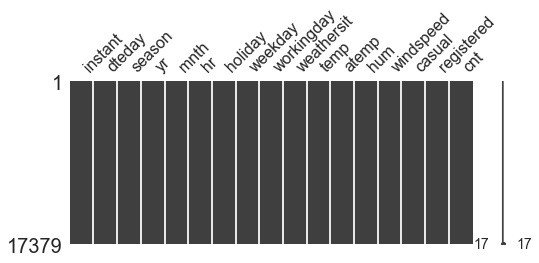

In [151]:
import missingno as msno
msno.matrix(df,figsize=(8,3))

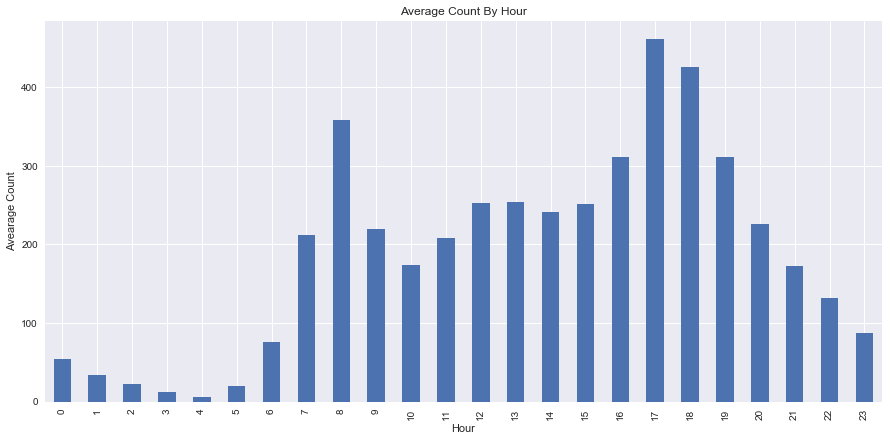

In [152]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby('hr').mean()['cnt'].plot(ax=ax, kind='bar')
ax.set(xlabel='Hour', ylabel='Avearage Count',title="Average Count By Hour")
plt.show()

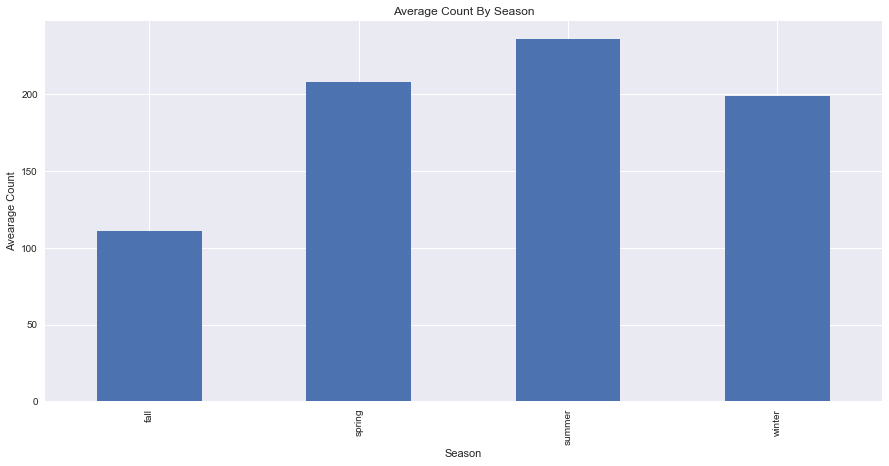

In [153]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby('season').mean()['cnt'].plot(ax=ax, kind='bar')
ax.set_xticklabels(['fall','spring','summer','winter'])
ax.set(xlabel='Season', ylabel='Avearage Count',title="Average Count By Season")
plt.show()

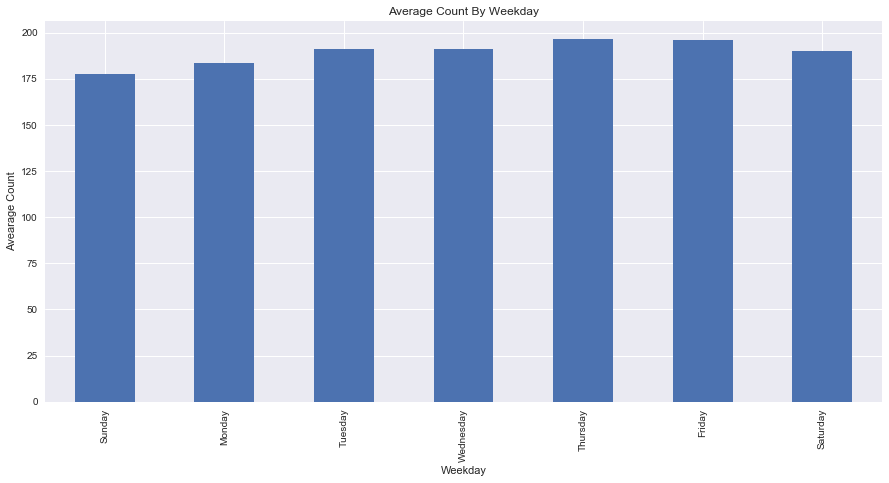

In [154]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['weekday']).mean()['cnt'].plot(ax=ax,kind='bar')
ax.set_xticklabels(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
ax.set(xlabel='Weekday', ylabel='Avearage Count',title="Average Count By Weekday")
plt.show()

### histograms of all the variables

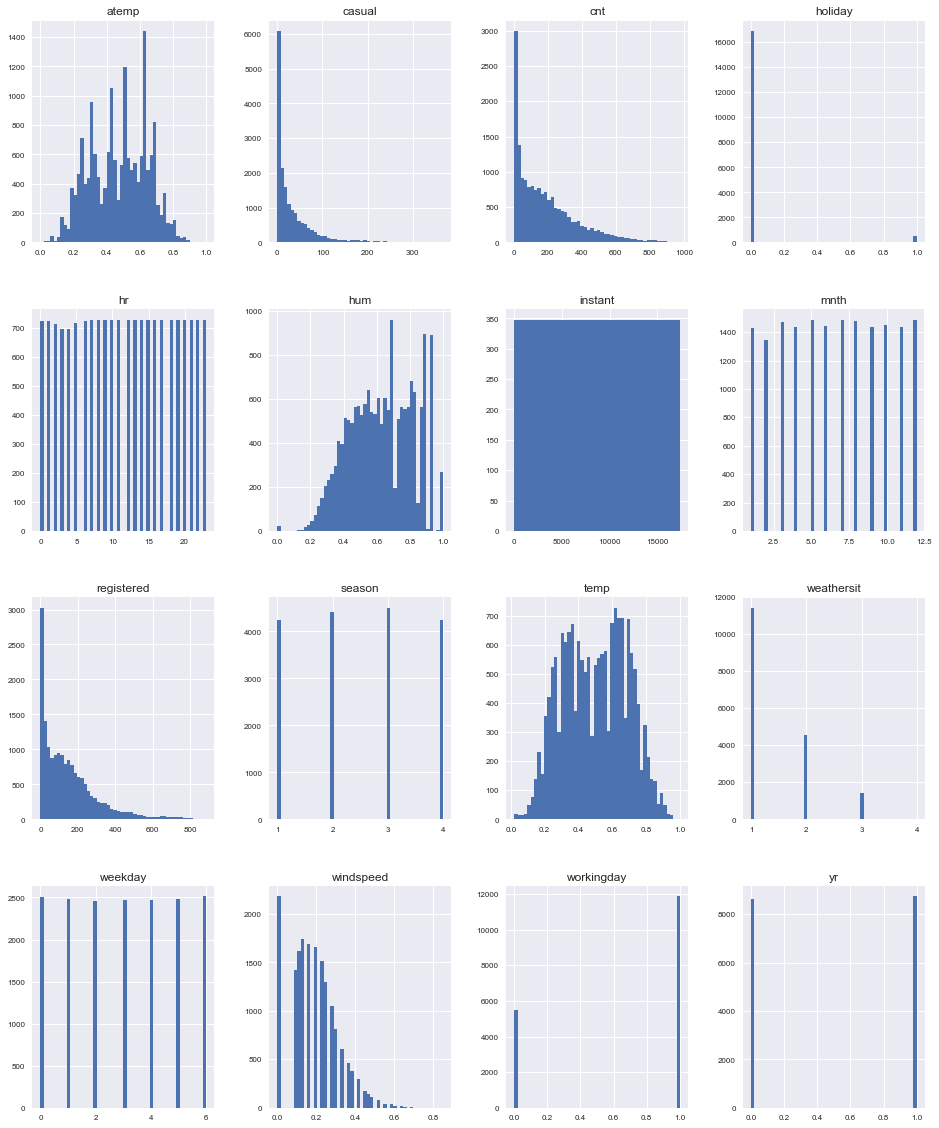

In [155]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

### finding correlation between count vs all the other variables

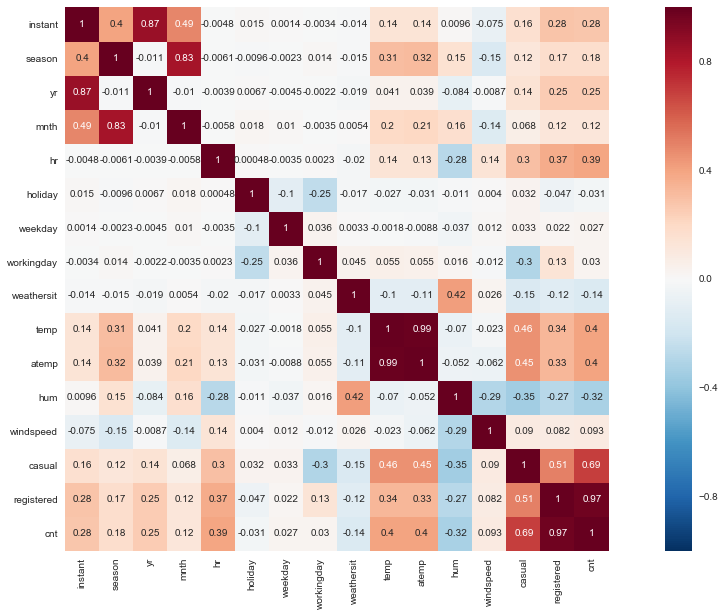

In [4]:
corr = df.corr()
fig, ax=plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr,square=True, annot=True)

### from the above analysis we can see that temp and atemp have same correlation with count hence we can remove atemp. Windspeed, holiday,weekday and workingday have very weak correlation with count. Hence they can be removed

### Mean Absolute Deviation

In [158]:
df.mad()

instant       4344.749986
season           0.987593
yr               0.499987
mnth             2.982815
hr               5.988233
holiday          0.055885
weekday          1.720869
workingday       0.433226
weathersit       0.558578
temp             0.165175
atemp            0.145324
hum              0.163311
windspeed        0.096312
casual          34.139960
registered     114.396155
cnt              1.196196
dtype: float64